<a href="https://colab.research.google.com/github/probml/pyprobml/blob/master/book1/intro/intro_figures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/probml/pyprobml/blob/master/notebooks/figures/chapter1_figures.ipynb)



##### Copyright and License.

![GitHub](https://img.shields.io/github/license/probml/pyprobml)

This colab was authored by Kevin P. Murphy (murphyk@gmail.com) and Mahmoud Soliman (mjs@aucegypt.edu)


#Setup and environment sanity checks
Check the hardware specifications for the GCP VM this notebook running on and the software stack installed.

In [8]:
# Imports
from tensorflow.python.client import device_lib
from psutil import virtual_memory
import cv2
from google.colab.patches import cv2_imshow
%tensorflow_version 2.x
import tensorflow as tf
import os

In [9]:
# Hardware check



def find_accelerator():
  
  mem = virtual_memory()
  devices=device_lib.list_local_devices()
  RAM="Physical RAM: {:.2f} GB".format(mem.total/(1024*1024*1024))
  try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  
    device=["TPU at "+str(tpu.cluster_spec().as_dict()['worker'])]  
  except ValueError:
    device =[d.physical_device_desc for d in devices if d.device_type=="GPU"]
  if not device:
    return None, RAM
  return device ,  RAM 

a,r=find_accelerator()
print("Accelerator found:",a,r)



Accelerator found: None Physical RAM: 12.72 GB


In [10]:
#title Install the extra required packages
# !apt install octave  -qq > /dev/null
# !apt-get install liboctave-dev -qq > /dev/null

In [11]:
#title Clone PyProbML repo and set enviroment variables
!git clone https://github.com/probml/pyprobml/ -q
os.environ["PYPROBML"]='/content/pyprobml/'

# Figures


In [12]:
# Helper code to display images
def display_image(image,ratio):
    img = cv2.imread(image, cv2.IMREAD_UNCHANGED)
    img=cv2.resize(img, (0,0), fx=ratio, fy=ratio) 
    cv2_imshow(img)
    print("\n")

Figure 1.1: 

Boxplots of MPG (miles per gallon) vs 

(a) country of origin, or 

(b) year of manufacture. The dotted red line is the
average

/content/pyprobml/scripts


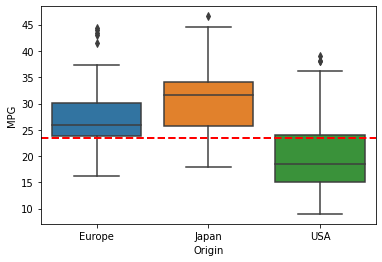

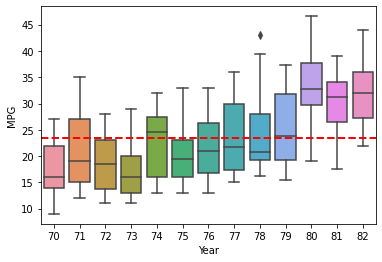

In [13]:
#@title Figure 1.1
%cd /content/pyprobml/scripts
%run /content/pyprobml/scripts/autompg_plot.py


Figure 1.2: 

(a) Linear regression on some 1d data. 

(b) The vertical lines denote the residuals between the observed output value for each input (blue circle) and its predicted value (red cross). The goal of least squares regression is to pick a line that minimizes the sum of squared residuals.

/content/pyprobml/scripts


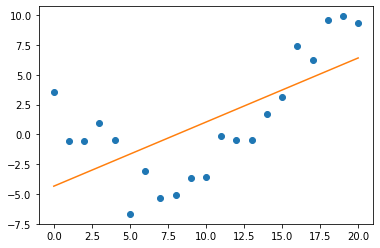

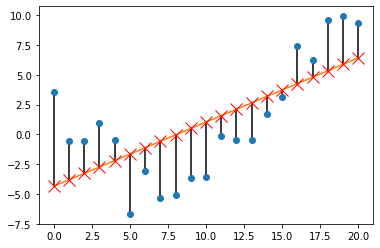

In [14]:
#@title Figure 1.2
%cd /content/pyprobml/scripts
%run /content/pyprobml/scripts/linreg_residuals_plot.py

Figure 1.5: 

Visualization of the Iris data as a pairwise scatter plot. The diagonal plots the marginal histograms of the 4 features.
The off diagonals contain scatterplots of all possible pairs of features.

/content/pyprobml/scripts


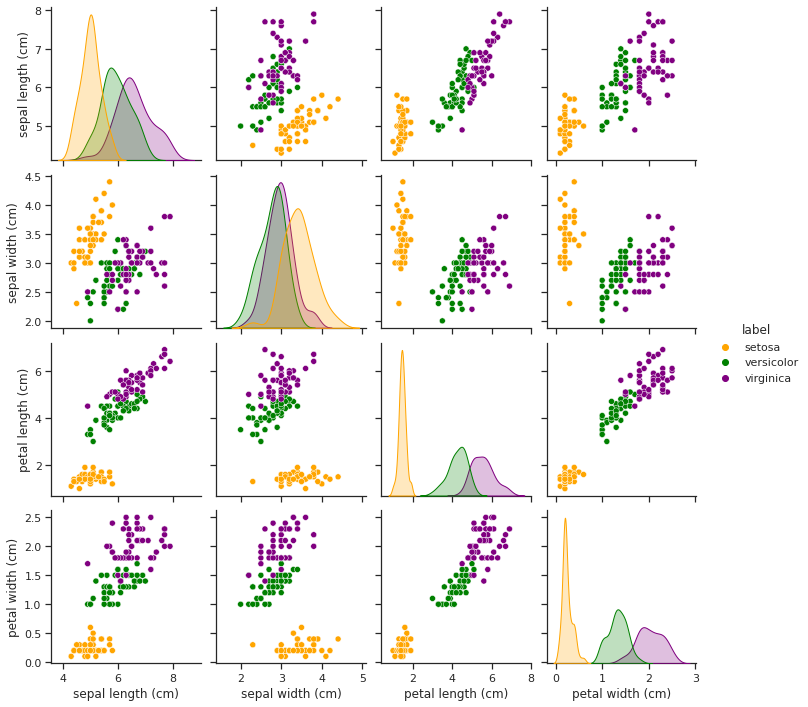

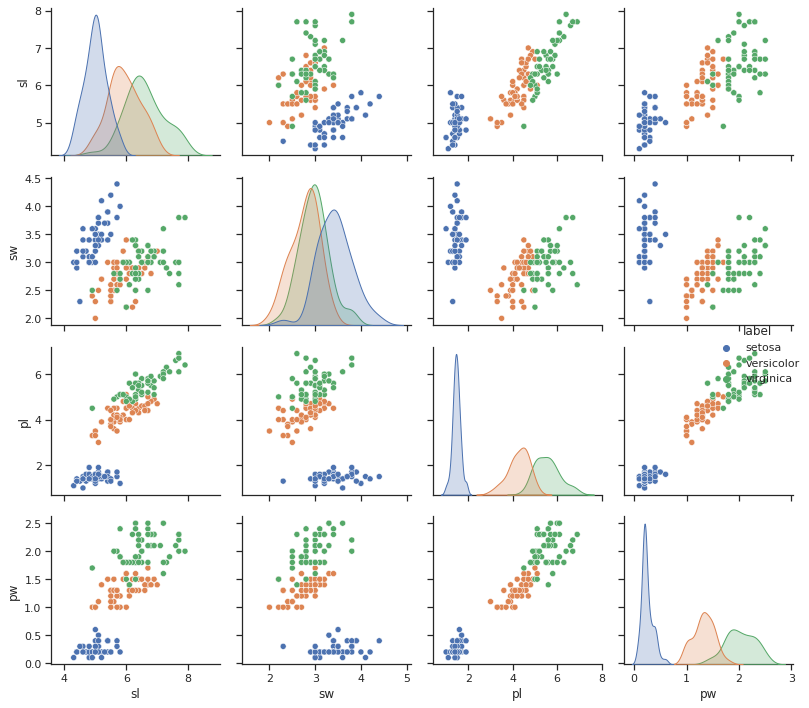

In [15]:
#@title Figure 1.5
%cd /content/pyprobml/scripts
%run /content/pyprobml/scripts/iris_plot.py

Figure 1.6: 

NLL loss surface for binary logistic regression applied to Iris dataset with 1 feature and 1 bias term.


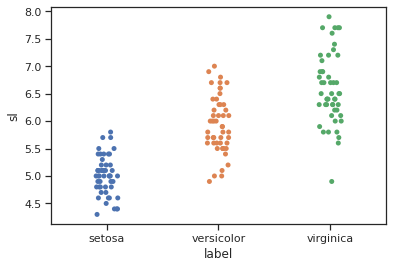

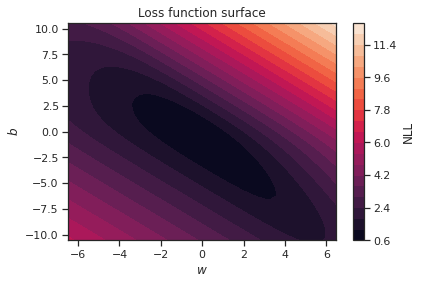

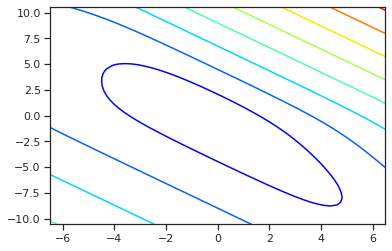

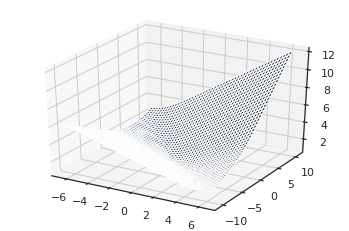

In [16]:
#@title Figure 1.6

%run /content/pyprobml/scripts/iris_logreg_loss_surface.py


Fig 1.7b 

Illustration of a nonconvex 2d function with many local maxima.

/content/pyprobml/scripts/matlab
Some output formats are not available.
    __print_parse_opts__ at line 388 column 9
    print at line 316 column 8
    saveas at line 105 column 3
    maxGMMplot>plotlandscape at line 264 column 1
    maxGMMplot at line 9 column 1


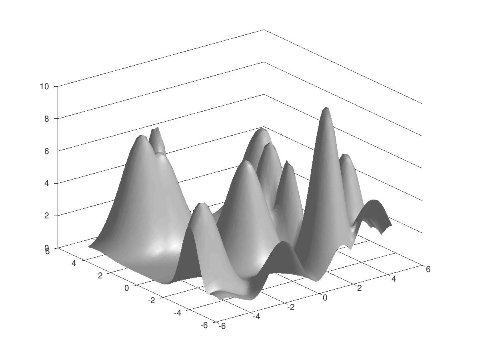

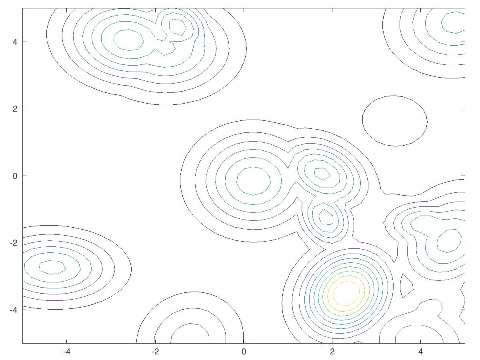



/content


In [17]:
#@title Figure 1.7b
%cd /content/pyprobml/scripts/matlab
!octave -W '/content/pyprobml/scripts/matlab/maxGMMplot.m' >> _
display_image("./output1.jpg",0.4)
print("\n")
display_image("./output2.jpg",0.4)
%cd /content/

Figure 1.8: 

(a-c) Polynomial of degrees 1, 14 and 20 fit to 21 datapoints (the same data as in Fig. 1.2). With a degree- 20 polynomial, we can perfectly interpolate all $N=21$ training points, as we see. 

(d) MSE vs degree.

/content/pyprobml/scripts


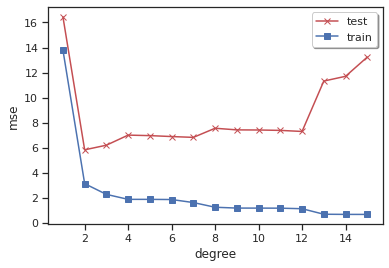

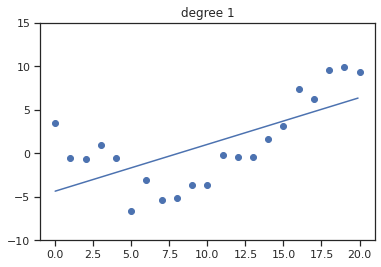

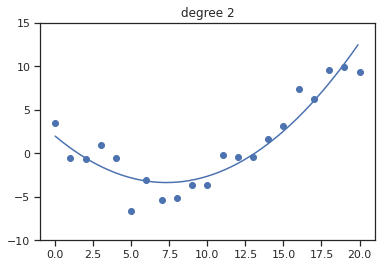

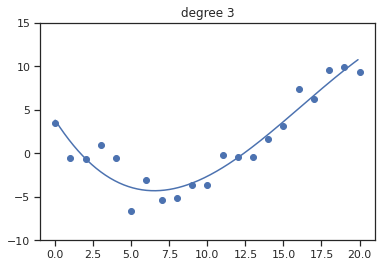

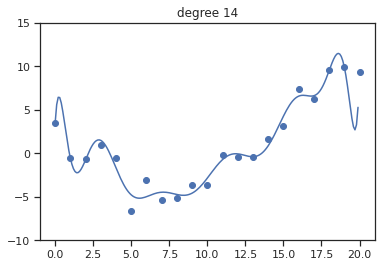

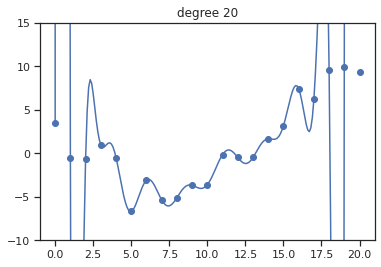

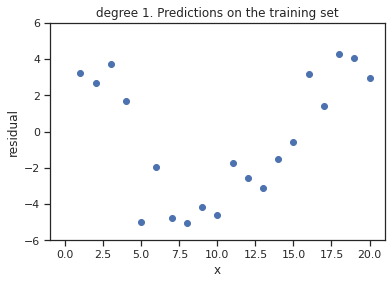

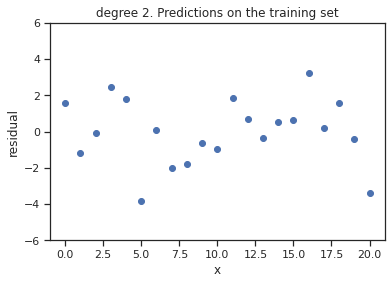

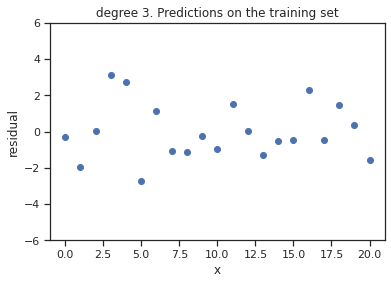

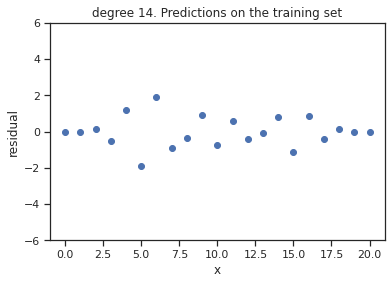

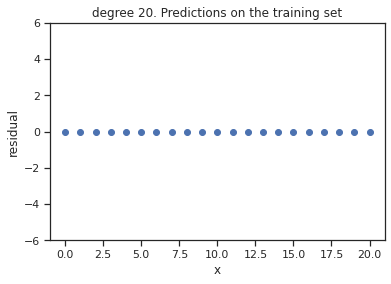

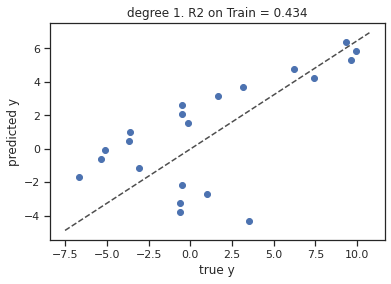

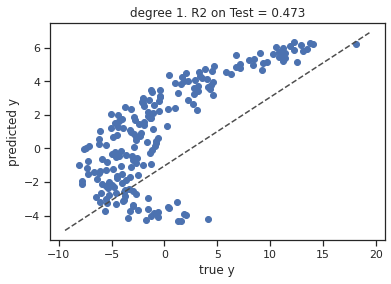

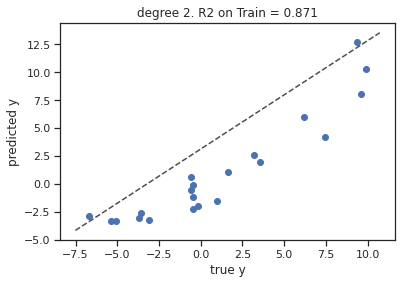

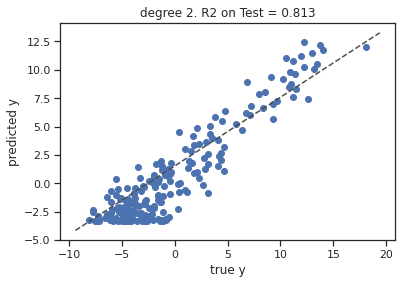

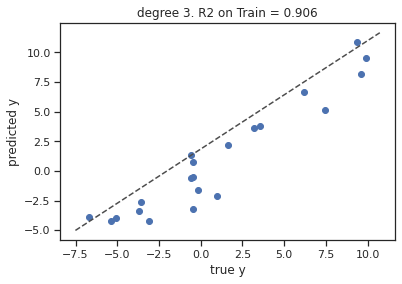

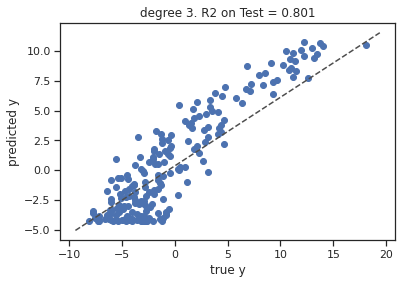

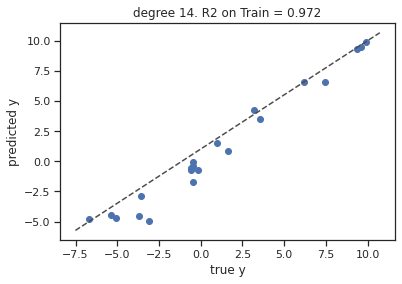

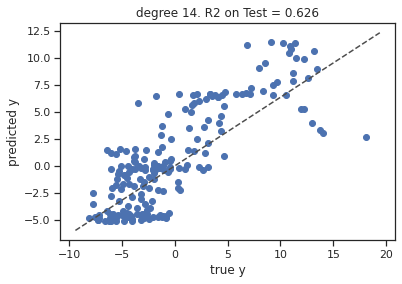

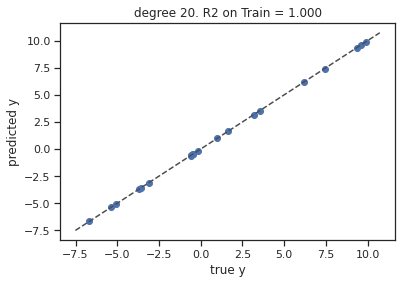

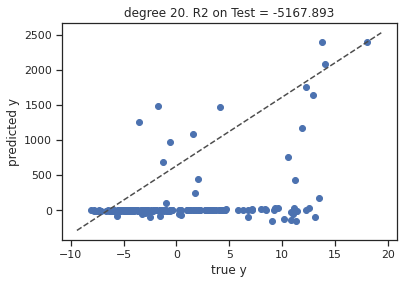

In [18]:
#@title Figure 1.8
%cd /content/pyprobml/scripts/
%run /content/pyprobml/scripts/linreg_poly_vs_degree.py

Figure 1.10 

Illustration of the binomial distribution with $N=10$ and 

(a) $\mu=0.25$ and 

(b) $\mu=0.9$.

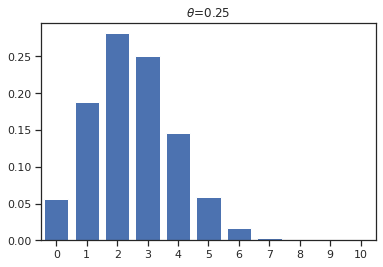

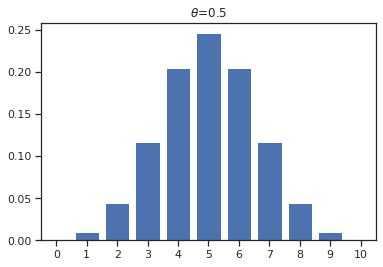

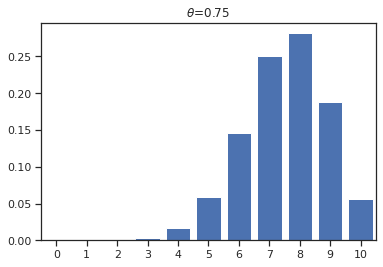

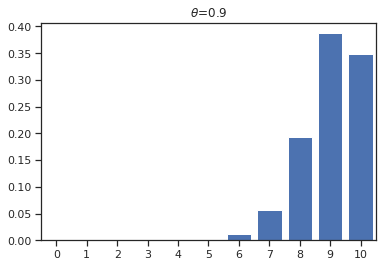

In [19]:
#@title Figure 1.10 
%run /content/pyprobml/scripts/binom_dist_plot.py
 

Figure 1.11: 

(a) The sigmoid (logistic) function $\sigma(a) =(1+e^{a})^ {-1}$ 

(b) The Heaviside function $I(a>0)$.


Figure 1.24: 

Plots of some popular activation functions.

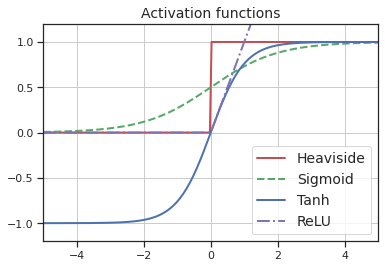

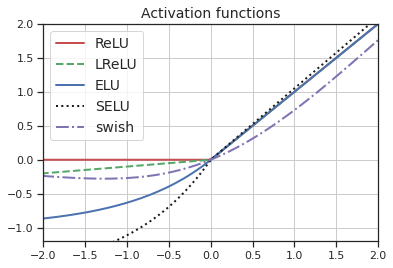

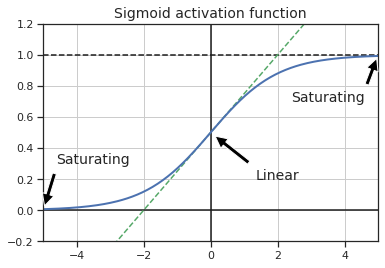

In [20]:
#@title Figure 1.11 and Figure 1.24
%run /content/pyprobml/scripts/activation_fun_plot.py

Figure 1.12:

Logistic regression applied to a 1-dimensional, 2-class version of the Iris dataset.

Figure 1.13b: 

Visualization of optimal linear decision boundary induced by logistic regression on a 2-class, 2-feature
version of the iris dataset

Figure 1.17: 

Logistic regression on the 3-class, 2-feature version of the Iris dataset.

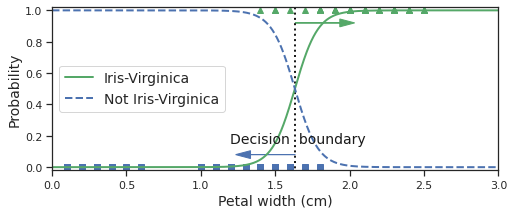

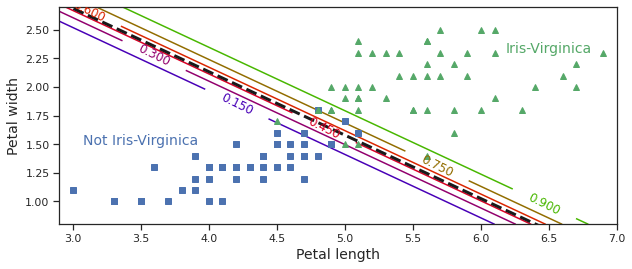

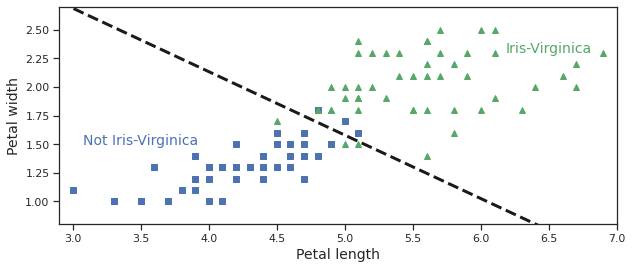

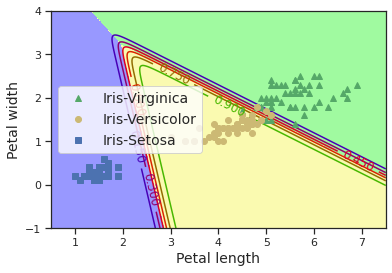

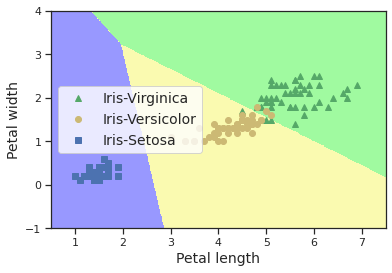

In [21]:
#@title Figure 1.12 and Figure 1.13b and 1.17
%run /content/pyprobml/scripts/iris_logreg.py

Figure 1.15: 

Plots of $\sigma(w_{1}x_{1}+w_{2}x_{2})$. Here $w=(w_{1},w_{2})$ defines the normal to the decision boundary. Points to the right
of this have $\sigma(w^T,x)>0.5$, and points to the left have $\sigma(w^T,x)<0.5$.

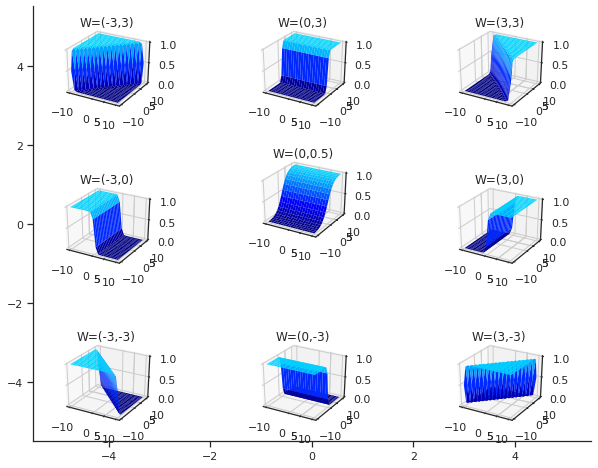

In [22]:
#@title Figure 1.15
%run /content/pyprobml/scripts/sigmoid_2d_plot.py

Figure 1.16: 

Softmax distribution $\mathcal{S}(a/T)$, where $a=(3,0,1)$, at temperatures of $T=100$, $T=2$ and $T=1$. When the
temperature is high (left), the distribution is uniform, whereas when the temperature is low (right), the distribution is “spiky”,
with most of its mass on the largest element

softmax_temp.pdf


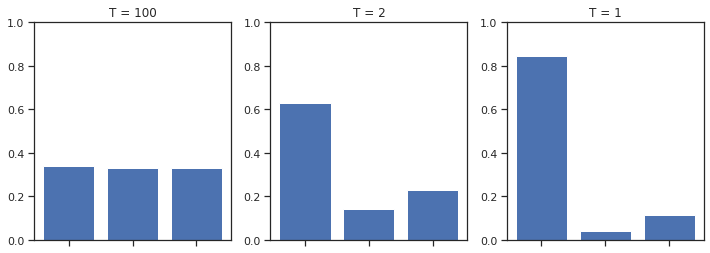

In [23]:
#@title Figure 1.16
%run /content/pyprobml/scripts/softmax_plot.py

Figure 1.18: 

Example of 3-class logistic regression with 2d inputs. 

(a) Original features. 

(b) Quadratic features. 

/content/pyprobml/scripts


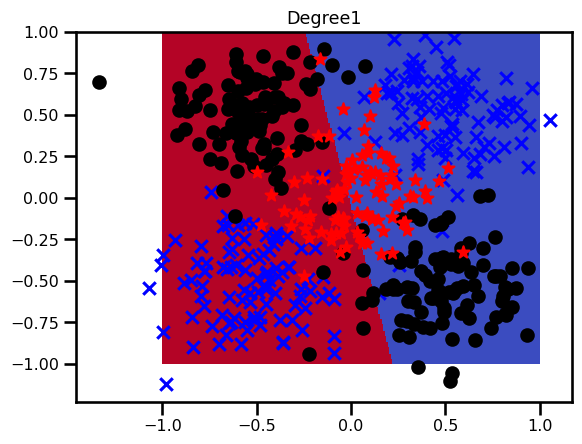

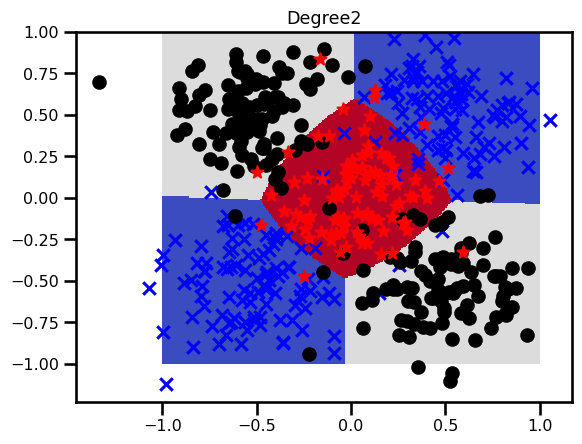

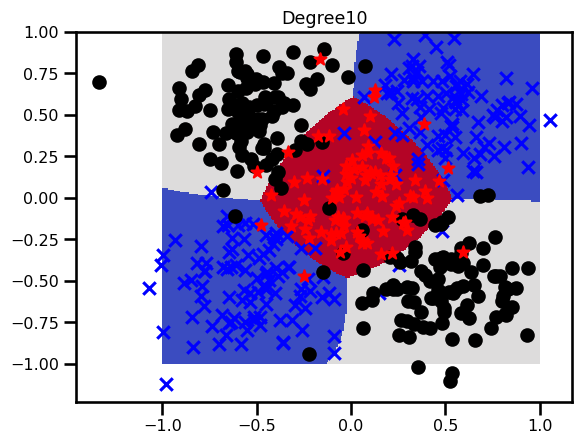

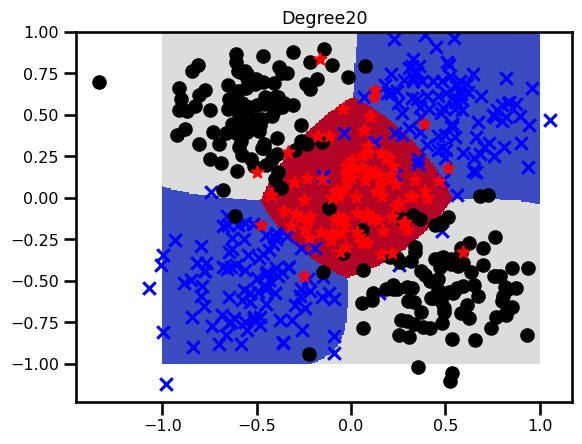

In [44]:
#@title Figure 1.18
%cd /content/pyprobml/scripts/
%run /content/pyprobml/scripts/logreg_multiclass_demo2.py

Figure 1.19:

(a) A Gaussian pdf with mean 0 and variance 1. (This is known as the **standard normal**.)  

(b) Visualization of the conditional density model $p(y|x,\theta)=\mathcal{N}(y|w_{0} + w_{1},\sigma ^{2})$. The density falls off
exponentially fast as we move away from the regression line.

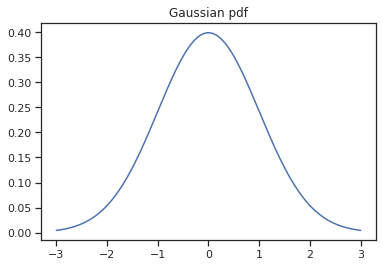

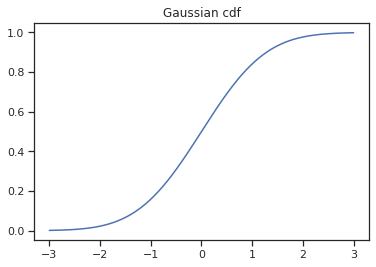

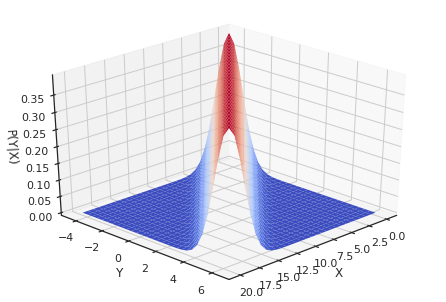

In [25]:
#@title Figure 1.19
%run /content/pyprobml/scripts/gauss_plot.py
%run /content/pyprobml/scripts/linreg_wedge_plot.py

Figure 1.20: 

Polynomial regression applied to 2d data. Vertical axis is temperature, horizontal axes are location within a
room. Data was collected by some remote sensing motes at Intel’s lab in Berkeley, CA (data courtesy of Romain Thibaux).

(a) The fitted plane has the form $\widehat{f}(x)=w_{0} + w_{1}x_{1} + w_{2}x_{2}$.

(b) Temperature data is fitted with a quadratic of the form $\widehat{f}(x)=w_{0} + w_{1}x_{1} + w_{2}x_{2} +w_{3}x_{1}^{2}+w_{4}x_{2}^{2}$


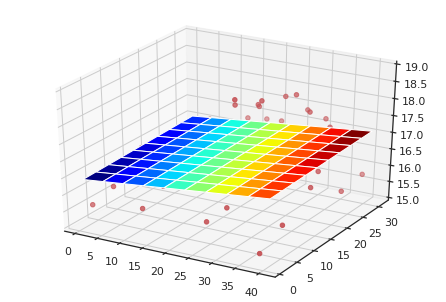

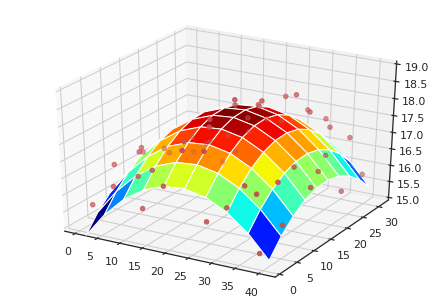

In [26]:
#@title Figure 1.20
%run /content/pyprobml/scripts/linreg_2d_surface_demo.py

Figure 1.21: 

(a) Contours of the RSS error surface for the example in Fig. 1.2. The blue cross represents the MLE. 

(b)
Corresponding surface plot.

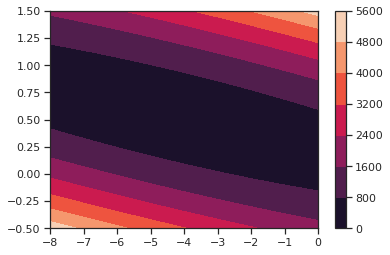

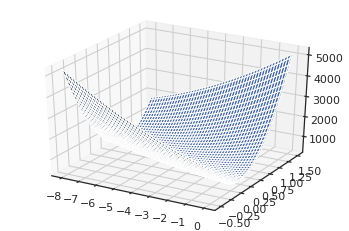

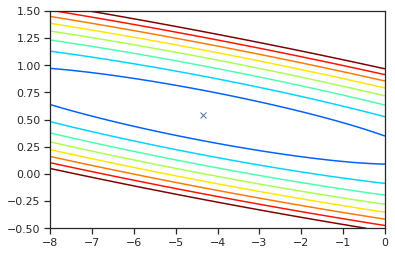

In [27]:
#@title Figure 1.21
%run /content/pyprobml/scripts/linreg_contours_sse_plot.py

Figure 1.23: 

Linear regression using Gaussian output with mean $\mu(x)=b + wx$   and 

(a) fixed variance $\sigma^{2}$ (homoskedastic) or


(b) input-dependent variance $\sigma(x)^{2}$ (heteroskedastic).

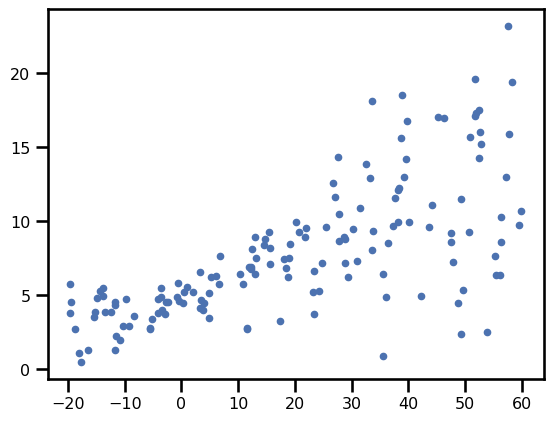

0.13435642
5.1268096


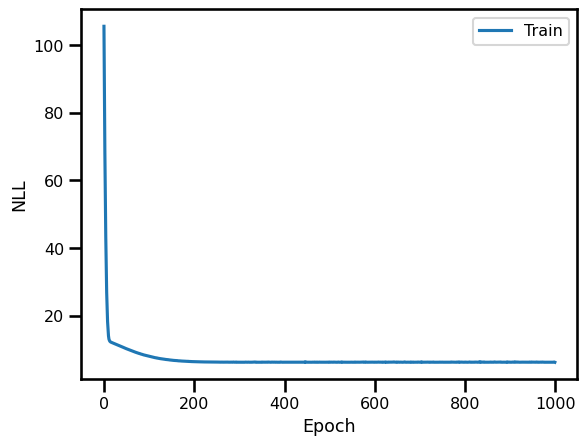

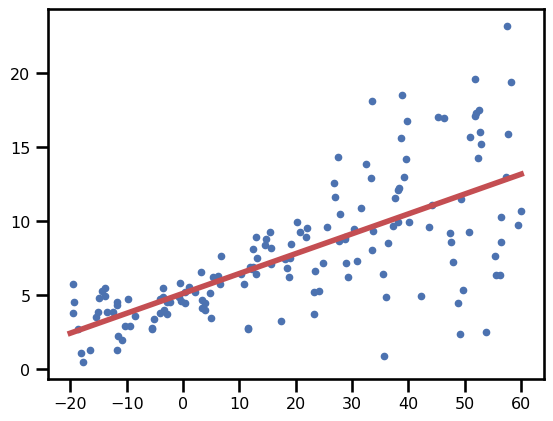

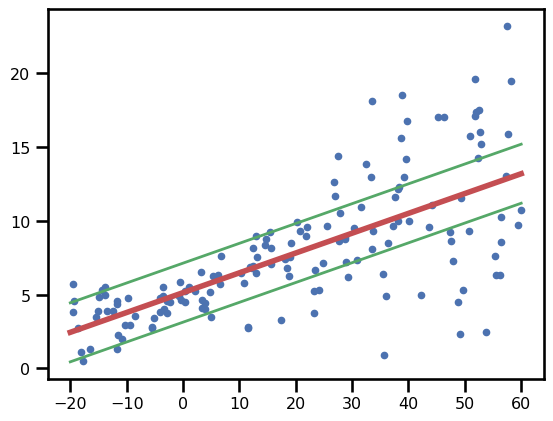

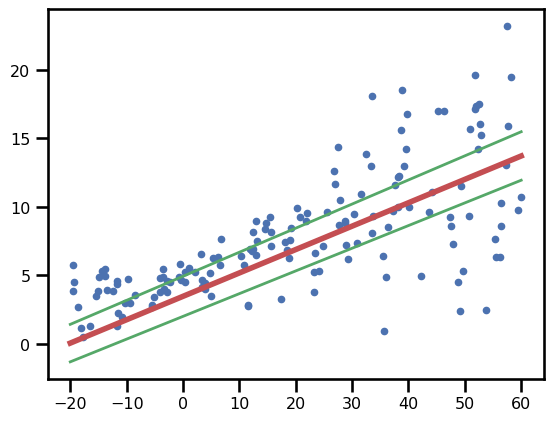

In [28]:
#@title Figure 1.23
%run /content/pyprobml/scripts/linreg_1d_hetero_tfp.py

Figure 1.27: 

Illustration of predictions from an MLP fit using MLE to a 1d regression dataset with growing noise. 

(a) Output
variance is input-dependent, as in Fig. 1.26. 

(b) Mean is computed using same model as in (a), but output variance is treated as
a fixed parameter $\sigma^{2}$, which is estimated by MLE after training, as in Sec. 10.3.4.2

In [29]:
#@title Figure 1.27
%run /content/pyprobml/scripts/nonlinreg_1d_hetero_tfp.py

ERROR:root:File `'/content/pyprobml/scripts/nonlinreg_1d_hetero_tfp.py'` not found.


Figure 1.28: 

(a) Visualization of the MNIST dataset [LeC+98a; YB19]. Each image is $32\times32\times1$, where the final dimension
of size 1 refers to gray scale. There are 60k training examples and 10k test examples. There are 10 classes, corresponding to
the digits 0–9. 

(b) Visualization of the FashionMNIST dataset [XRV17]. Each image is
$32\times32\times1$, where the final dimension of size 1 refers to gray scale. There are 60k training examples and 10k test examples.
There are 10 classes: ’T-shirt/top’, ’Trouser’, ’Pullover’, ’Dress’, ’Coat’, ’Sandal’, ’Shirt’, ’Sneaker’, ’Bag’, ’Ankle boot’. We show
the first 25 images from the training set. 

11493376/11490434 [==============================] - 0s 0us/step


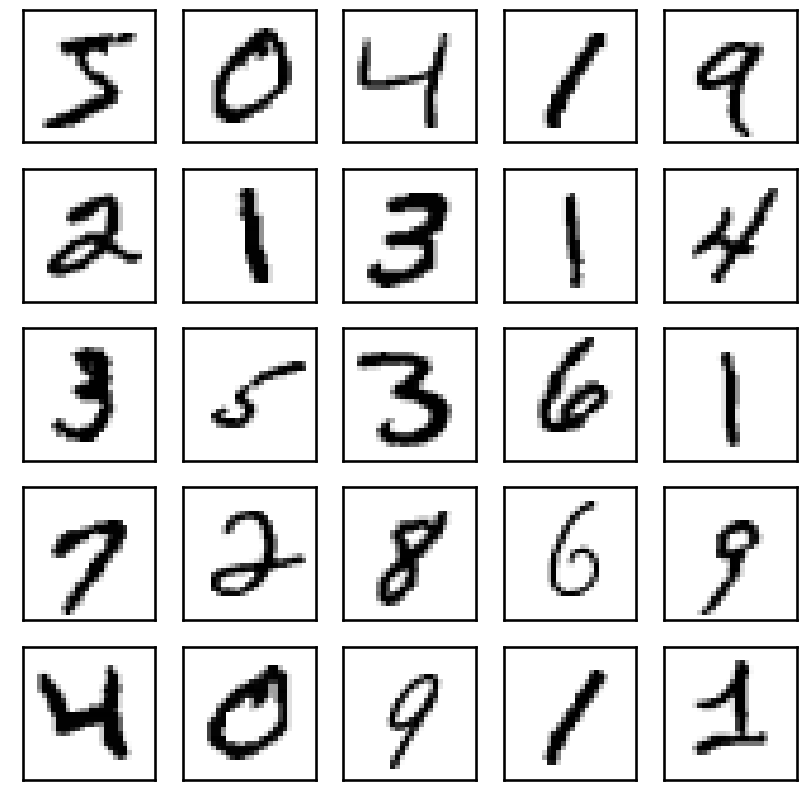

using 0 hidden units
Epoch 1/2
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7201 - accuracy: 0.8123
Epoch 2/2
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3063 - accuracy: 0.9147
time spent training 4.479
test accuracy 0.920
313/313 [==============================] - 0s 867us/step - loss: 0.2849 - accuracy: 0.9200
loss :  0.2849292457103729
accuracy :  0.9200000166893005
using 100 hidden units
Epoch 1/2
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5174 - accuracy: 0.8507
Epoch 2/2
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1715 - accuracy: 0.9507
time spent training 6.402
test accuracy 0.966
313/313 [==============================] - 0s 1ms/step - loss: 0.1086 - accuracy: 0.9663
loss :  0.10856439173221588
accuracy :  0.9663000106811523

sklearn version
using 0 hidden units
Epoch 1/2
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6990 - accuracy: 0.8195
Epoch 2/2
1875/1875 [===

ERROR:root:File `'/content/pyprobml/scripts/fashion_mlp_tf.py'` not found.


test accuracy 0.968


In [30]:
#@title Figure 1.28
%run /content/pyprobml/scripts/mnist_mlp_tf.py
%run /content/pyprobml/scripts/fashion_mlp_tf.py

Figure 1.29: 

(a) Some images from the CIFAR-10 dataset . Each image is $32\times32\times3$, where the final dimension of
size 3 refers to RGB. There are 50k training examples and 10k test examples. There are 10 classes: plane, car, bird, cat, deer,
dog, frog, horse, ship, and truck. We show the first 25 images from the training set.

170500096/170498071 [==============================] - 11s 0us/step


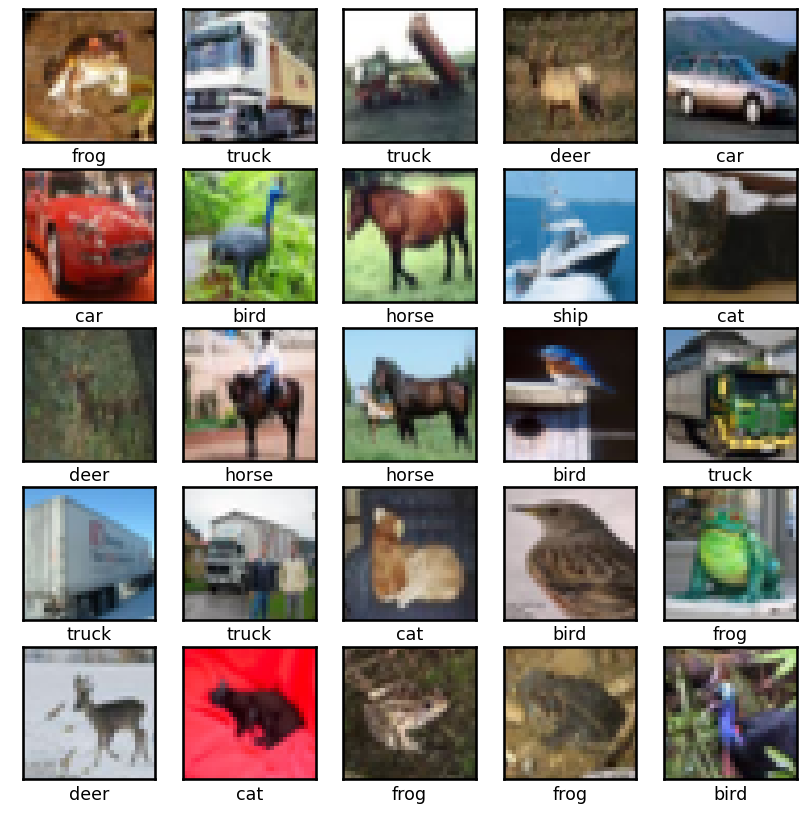

In [31]:
#@title Figure 1.29
%run /content/pyprobml/scripts/cifar_viz_tf.py


Figure 1.37: 

A simple regression tree on two inputs.

/content/pyprobml/scripts/matlab
Some output formats are not available.
    __print_parse_opts__ at line 388 column 9
    print at line 316 column 8
    saveas at line 105 column 3
    regtreeSurfaceDemo at line 41 column 1


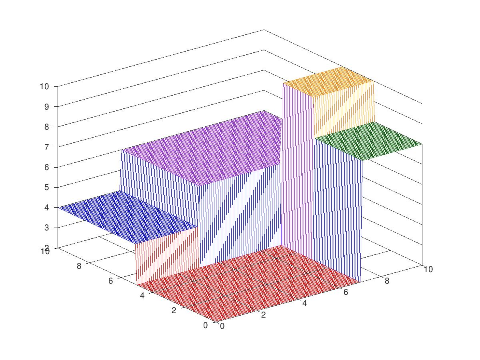

In [32]:
#@title Figure 1.37

%cd /content/pyprobml/scripts/matlab
!octave -W '//content/pyprobml/scripts/matlab/regtreeSurfaceDemo.m' >> _
display_image("./output1.jpg",0.4)


Figure 1.38: 

(a) Iris data. We only show the first two features, sepal length and sepal width, and ignore petal length and petal
width. 

(b) Decision boundaries learned by an unpruned decision tree. 

/content/pyprobml/scripts/matlab
error: load: unable to find file fisheriris
error: called from
    dtreeDemoIris at line 9 column 1


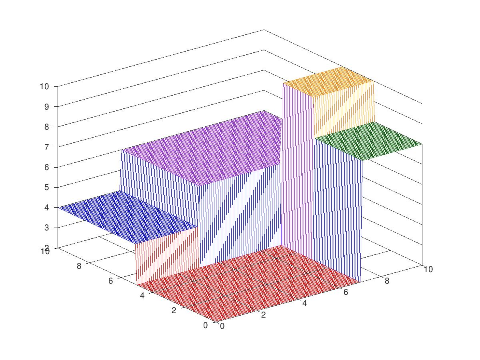

In [33]:
#@title Figure 1.38 and 1.39

%cd /content/pyprobml/scripts/matlab

!octave -W '/content/pyprobml/scripts/matlab/dtreeDemoIris.m' >> _
display_image("./output1.jpg",0.4)


Figure 1.40: 

(a) Illustration of a K-nearest neighbors classifier in $2d$ for $K=5$. The nearest neighbors of test point $x$ have
labels {1, 1, 1, 0, 0} so we predict $p(y=1|x,\mathcal{D})=3/5$. 

(b) Illustration of the Voronoi tesselation induced by $1-NN$.

Using scipy.spatial.voronoi_plot_2d, wait...


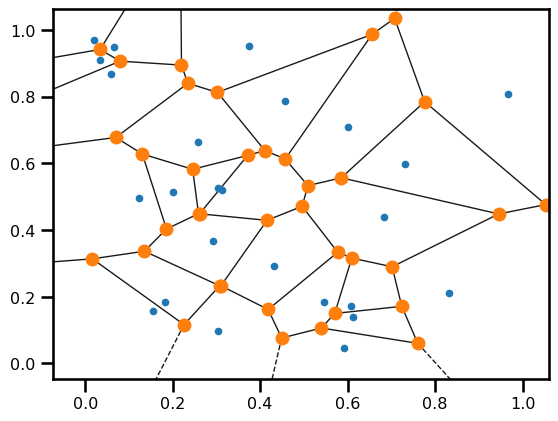

Using scipy.spatial.KDTree, wait a few seconds...


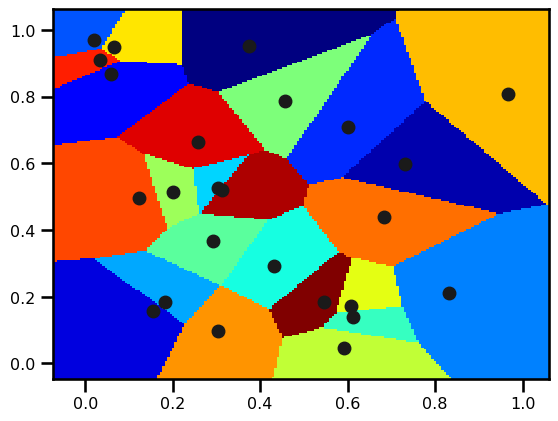

In [34]:
#@title Figure 1.40
%run /content/pyprobml/scripts/knn_voronoi_plot.py


Figure 1.41: 

Decision boundaries induced by a KNN classifier. 

(a) $K=1$. 

(b) $K =2$. 

(c) $K =5$. 

(d) Train and test error vs $K$.


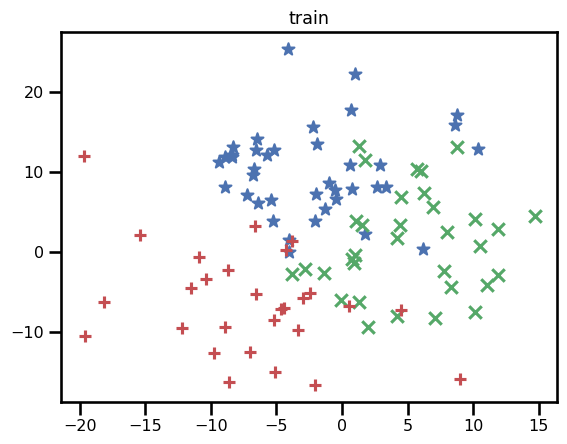

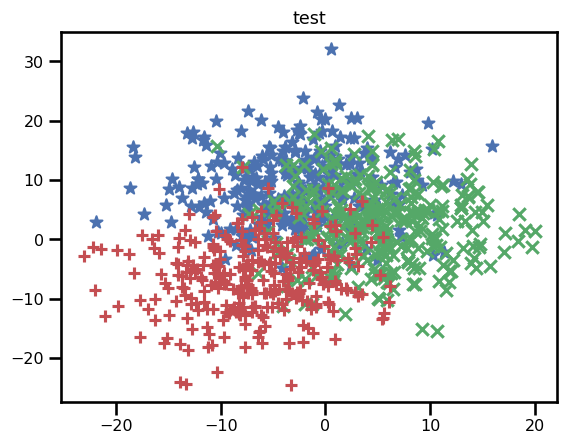

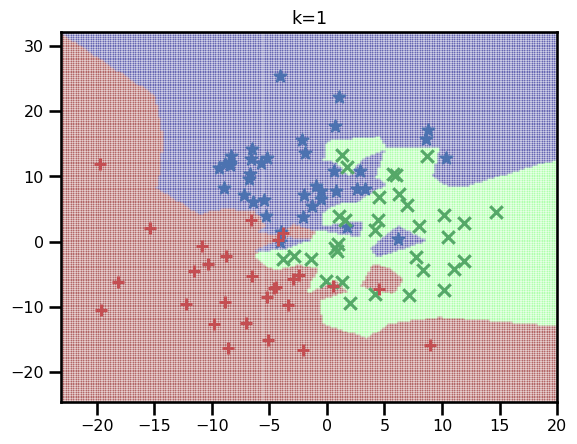

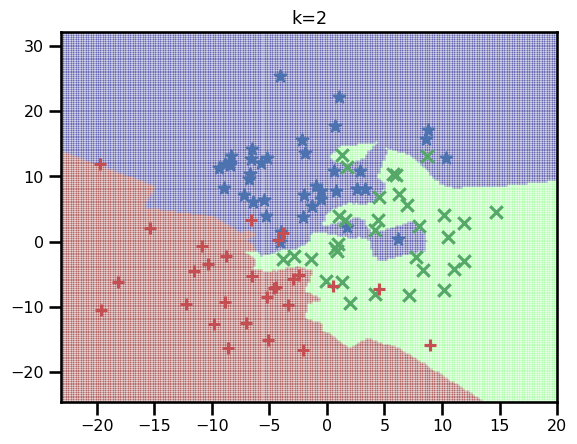

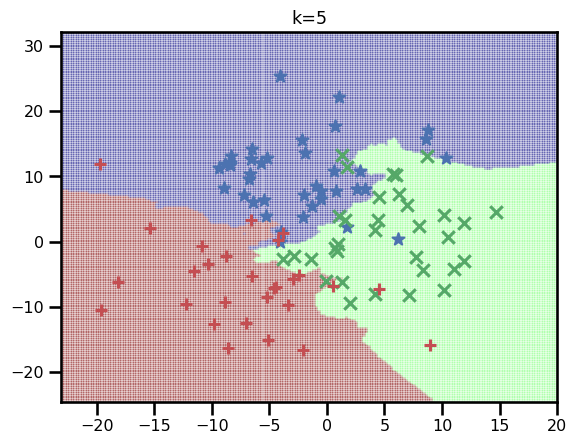

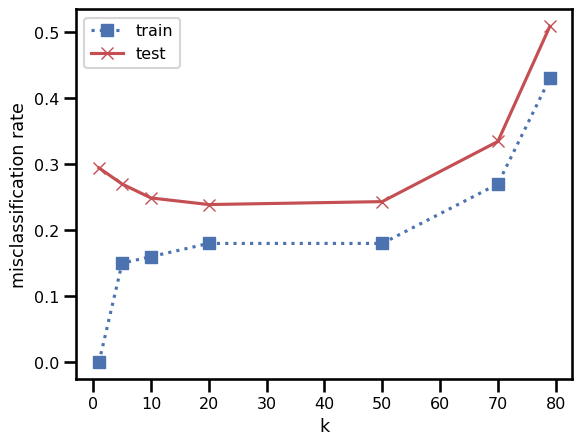

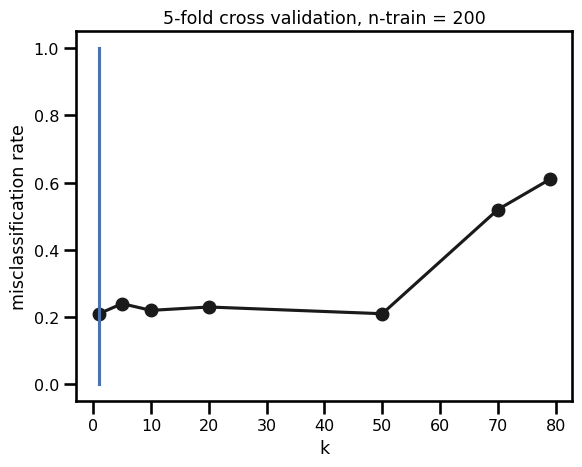

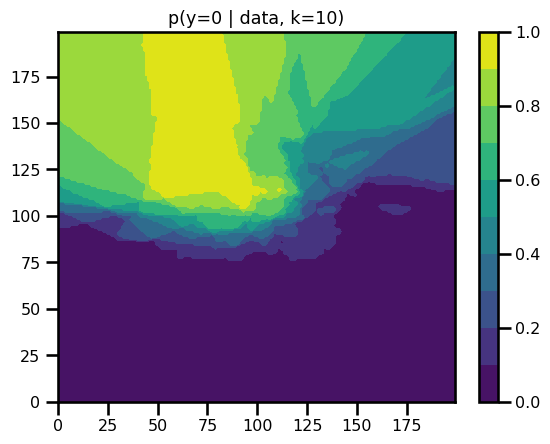

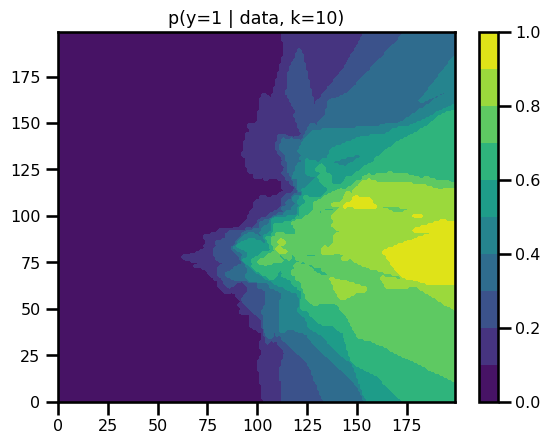

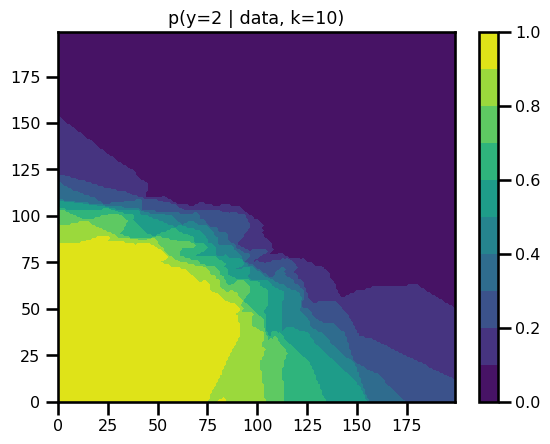

In [35]:
#@title Figure 1.41
%run /content/pyprobml/scripts/knn_classify_demo.py


Figure 1.42b: 


Illustration of the curse of dimensionality. 


(b)We plot the edge length of a cube needed to cover a given volume of the unit cube as a function of the number of dimensions.

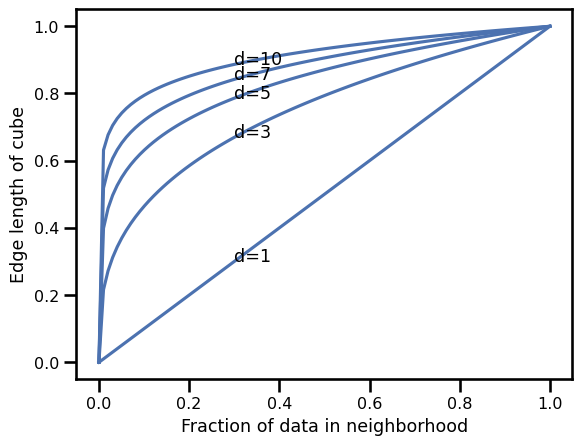

In [36]:
#@title Figure 1.42
%run /content/pyprobml/scripts/curse_dimensionality_plot.py


Figure 1.43: 

(a-c) Ridge regression applied to a degree 14 polynomial fit to 21 datapoints. 

(d) MSE vs strength of regularizer.
The degree of regularization increases from left to right, so model complexity decreases from left to right.

did not save figure polyfitVsRidge.pdf, since figdir not defined


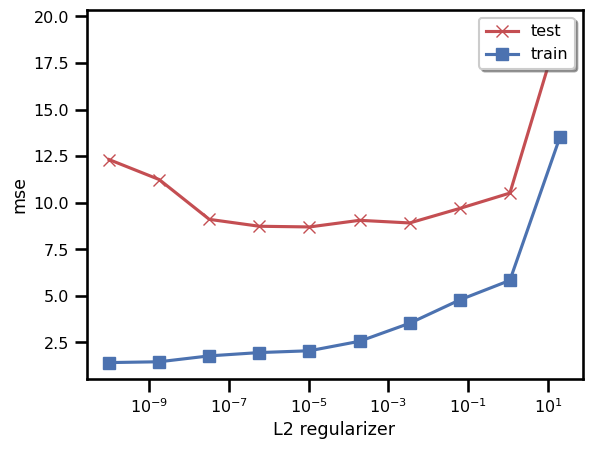

did not save figure polyfitRidge0.pdf, since figdir not defined


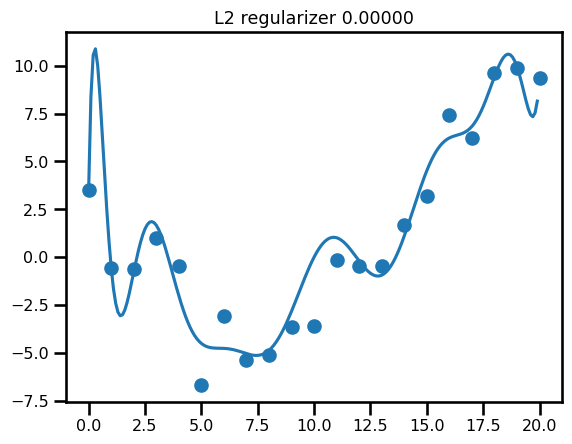

did not save figure polyfitRidge1.pdf, since figdir not defined


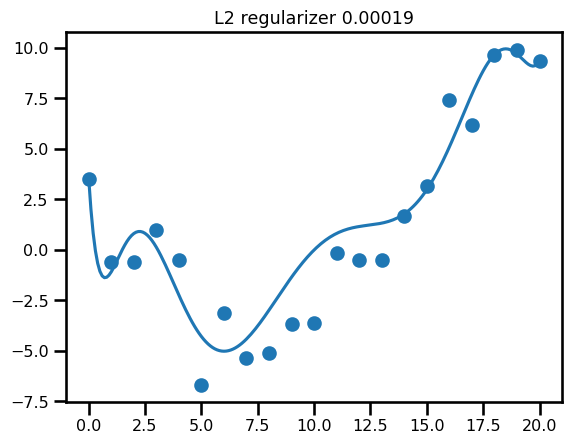

did not save figure polyfitRidge2.pdf, since figdir not defined


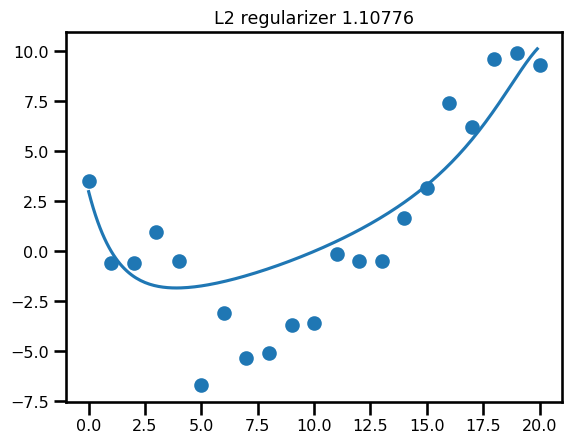

In [37]:
#@title Figure 1.43
%run /content/pyprobml/scripts/linreg_poly_ridge.py


Figure 1.44: 


Predictions made by a polynomial regression model fit to a small dataset. 

(a) Plugin approximation to predictive
density using the MLE. Black curve is posterior mean, error bars are 2 standard deviations. 

(b) Bayesian posterior predictive
density, obtained by integrating out the parameters. Generated by linreg_post_pred_plot.py.

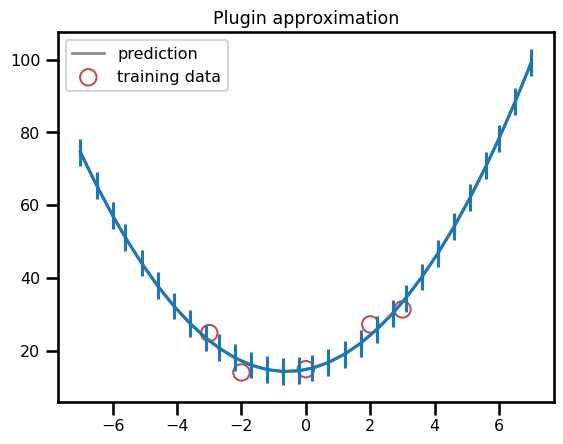

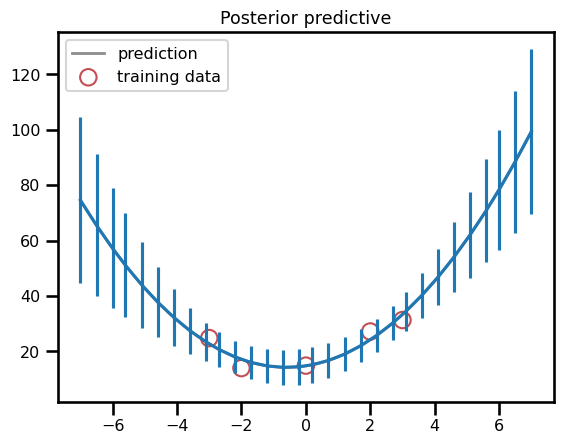

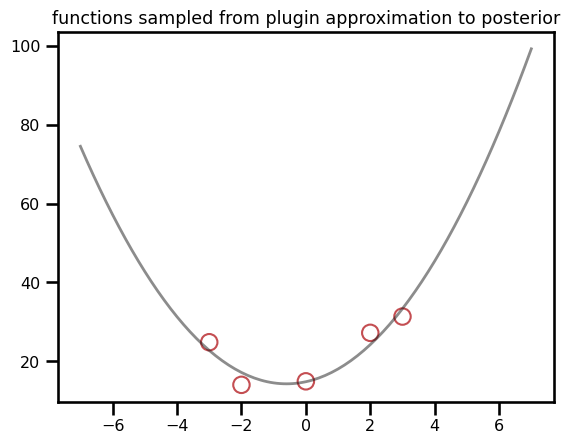

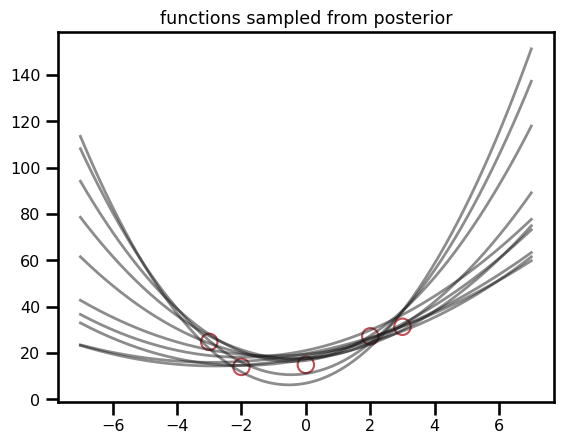

In [38]:
#@title Figure 1.44
%run /content/pyprobml/scripts/linreg_post_pred_plot.py


Figure 1.45: 

Performance of a text classifier (an MLP applied to a bag of word embeddings using average pooling) vs number of
training epochs on the IMDB movie sentiment dataset. $Blue = train, red = validation$. 

(a) Cross entropy loss. Early stopping is
triggered at about epoch 25. 

(b) Classification accuracy.

/content/pyprobml/scripts
2.4.0
17465344/17464789 [==============================] - 0s 0us/step
(25000,)
218
189
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 

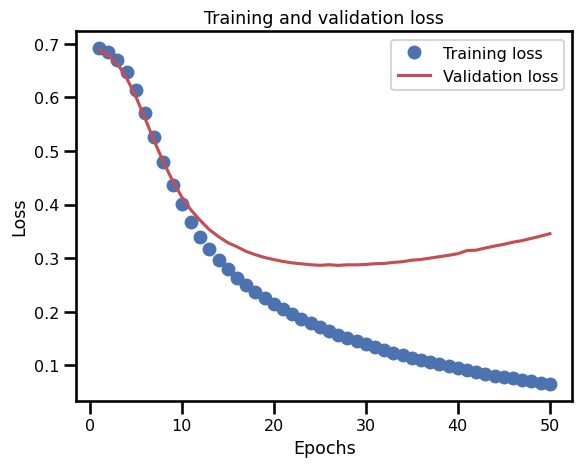

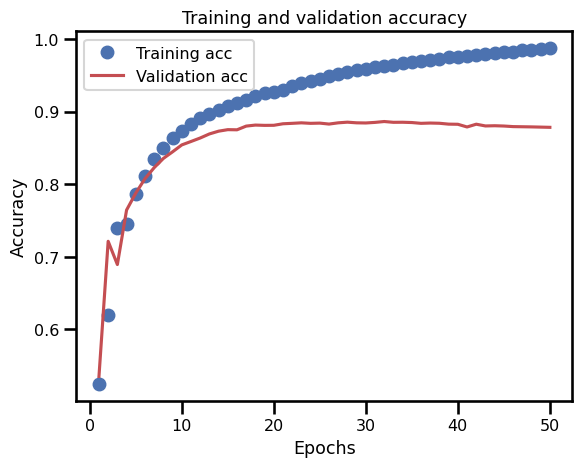


.INFO:tensorflow:Assets written to: imdb_keras_best_model.ckpt/assets


INFO:tensorflow:Assets written to: imdb_keras_best_model.ckpt/assets


.INFO:tensorflow:Assets written to: imdb_keras_best_model.ckpt/assets


INFO:tensorflow:Assets written to: imdb_keras_best_model.ckpt/assets


..INFO:tensorflow:Assets written to: imdb_keras_best_model.ckpt/assets


INFO:tensorflow:Assets written to: imdb_keras_best_model.ckpt/assets


.INFO:tensorflow:Assets written to: imdb_keras_best_model.ckpt/assets


INFO:tensorflow:Assets written to: imdb_keras_best_model.ckpt/assets


.INFO:tensorflow:Assets written to: imdb_keras_best_model.ckpt/assets


INFO:tensorflow:Assets written to: imdb_keras_best_model.ckpt/assets


.INFO:tensorflow:Assets written to: imdb_keras_best_model.ckpt/assets


INFO:tensorflow:Assets written to: imdb_keras_best_model.ckpt/assets


.INFO:tensorflow:Assets written to: imdb_keras_best_model.ckpt/assets


INFO:tensorflow:Assets written to: imdb_keras_best_model.ckpt/assets


.INFO:tensorflow:Assets written to: imdb_keras_best_model.ckpt/assets


INFO:tensorflow:Assets written to: imdb_keras_best_model.ckpt/assets


.INFO:tensorflow:Assets written to: imdb_keras_best_model.ckpt/assets


INFO:tensorflow:Assets written to: imdb_keras_best_model.ckpt/assets


.INFO:tensorflow:Assets written to: imdb_keras_best_model.ckpt/assets


INFO:tensorflow:Assets written to: imdb_keras_best_model.ckpt/assets


.INFO:tensorflow:Assets written to: imdb_keras_best_model.ckpt/assets


INFO:tensorflow:Assets written to: imdb_keras_best_model.ckpt/assets


.INFO:tensorflow:Assets written to: imdb_keras_best_model.ckpt/assets


INFO:tensorflow:Assets written to: imdb_keras_best_model.ckpt/assets


.INFO:tensorflow:Assets written to: imdb_keras_best_model.ckpt/assets


INFO:tensorflow:Assets written to: imdb_keras_best_model.ckpt/assets


.INFO:tensorflow:Assets written to: imdb_keras_best_model.ckpt/assets


INFO:tensorflow:Assets written to: imdb_keras_best_model.ckpt/assets


..INFO:tensorflow:Assets written to: imdb_keras_best_model.ckpt/assets


INFO:tensorflow:Assets written to: imdb_keras_best_model.ckpt/assets


.INFO:tensorflow:Assets written to: imdb_keras_best_model.ckpt/assets


INFO:tensorflow:Assets written to: imdb_keras_best_model.ckpt/assets


..

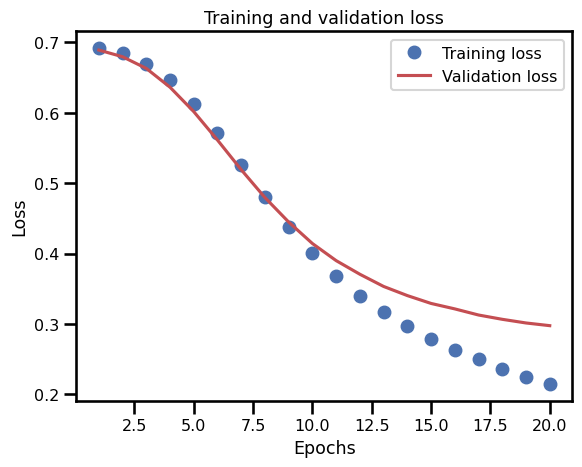

In [39]:
#@title Figure 1.45
%cd /content/pyprobml/scripts
%run /content/pyprobml/scripts/imdb_mlp_bow_tf.py


Figure 1.46: 

MSE on training and test sets vs size of training set, for data generated from a degree 2 polynomial with Gaussian
noise of variance $\sigma^{2}$=4. We fit polynomial models of varying degree to this data.

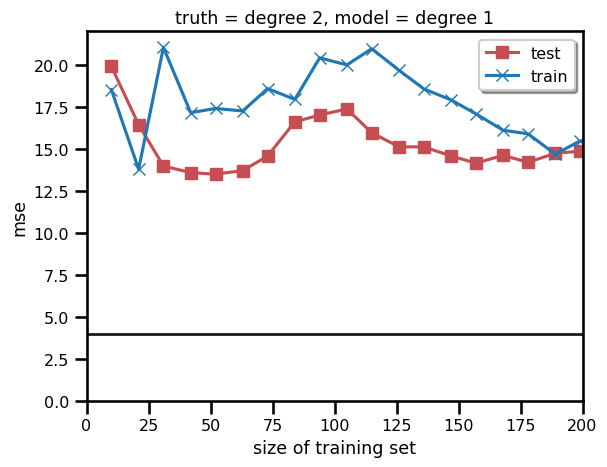

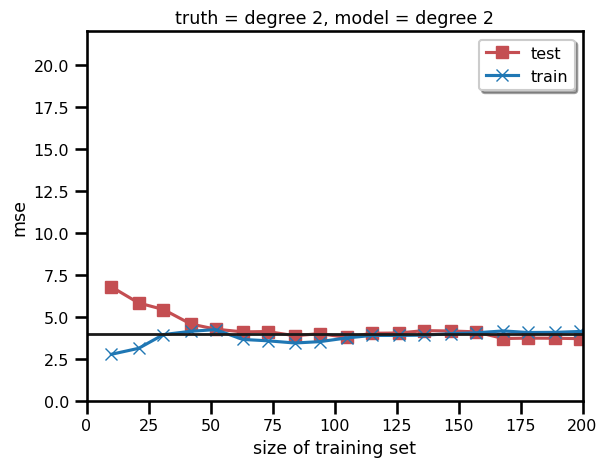

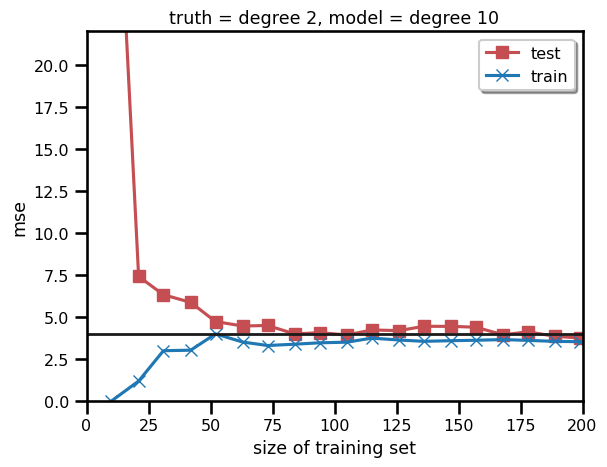

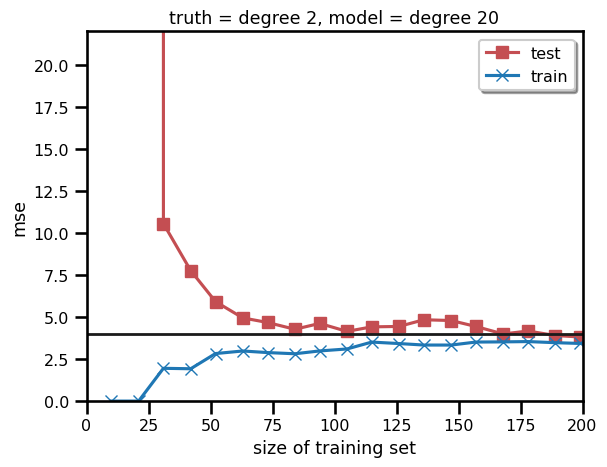

In [40]:
#@title Figure 1.46
%run /content/pyprobml/scripts/linreg_poly_vs_n.py


Figure 1.49: 

(a) A scatterplot of the petal features from the iris dataset. 

(b) The result of unsupervised clustering using $K=3$.

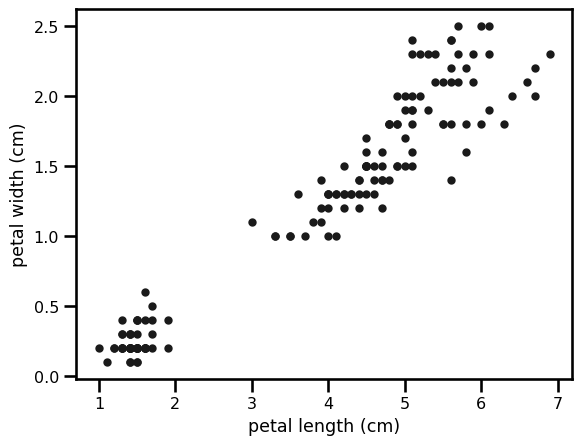

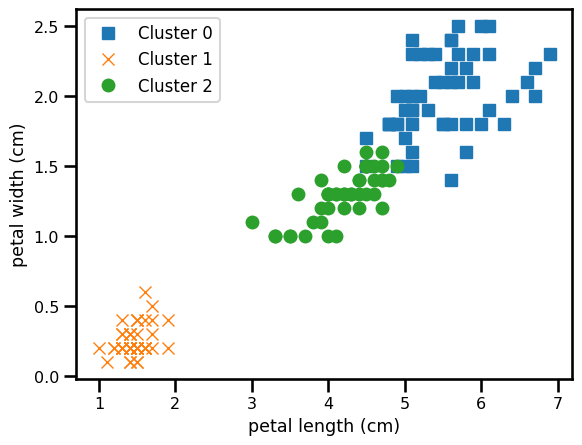

In [41]:
#@title Figure 1.49
%run /content/pyprobml/scripts/iris_kmeans.py

Figure 1.50: 

(a) Some 3d data points. 

(b) We fit a 2d linear subspace to the 3d data using PCA.

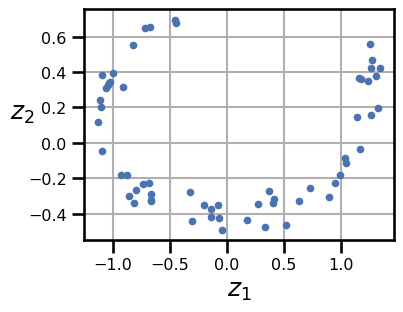

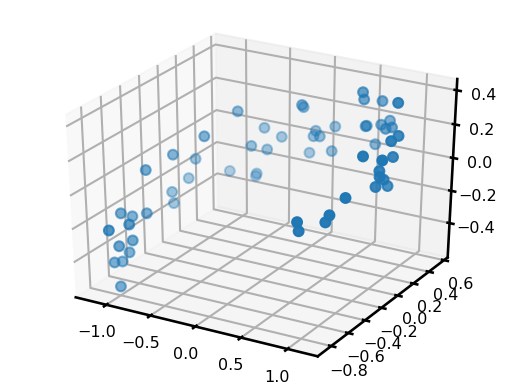

In [42]:
#@title Figure 1.50
%run /content/pyprobml/scripts/pca_demo.py